# Plotting an interactive map with Folium

In [1]:
INPUT_FOLDER_NAME = "/Users/abuzatu/Work/data/geo_spatial/Germany/Berlin/Accidents_Car_2019"
INPUT_FILE_NAME = f"{INPUT_FOLDER_NAME}/berlin_2019_car_accidents.pickle"

OUTPUT_FOLDER_NAME = "./output"

BERLIN_LAT = 52.5243700
BERLIN_LON = 13.4105300

In [2]:
import pathlib
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import selenium
import mplleaflet

In [3]:
# create output folder
pathlib.Path(OUTPUT_FOLDER_NAME).mkdir(parents=True, exist_ok=True)

In [4]:
gdf = pd.read_pickle(INPUT_FILE_NAME)
gdf.head()

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,geometry
0,49090,11,12,12301203,Wittenau Süd,2019,1,13,6,3,...,0,0,0,0,1,794062.2837,5835083.823,13.34146,52.58609,POINT (13.34146 52.58609)
1,49091,11,3,3040818,Pankow Süd,2019,1,9,5,3,...,0,0,0,0,0,799130.4007,5832327.415,13.41356,52.55862,POINT (13.41356 52.55862)
2,49093,11,12,12103115,Breitkopfbecken,2019,3,21,6,3,...,0,0,0,0,0,795437.6130,5833549.454,13.36034,52.57159,POINT (13.36034 52.57159)
3,49096,11,6,6040703,Nikolassee,2019,1,7,6,2,...,1,0,0,0,1,786714.3754,5817042.137,13.21777,52.42825,POINT (13.21777 52.42825)
4,49097,11,7,7030303,Grazer Platz,2019,2,15,3,3,...,0,0,0,0,0,796074.3342,5822724.905,13.36007,52.47421,POINT (13.36007 52.47421)


In [5]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

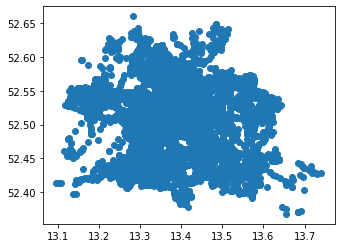

In [6]:
gdf.plot()

In [7]:
# create a subset of the points, here the deadline accidents
gdf_death = gdf[gdf.UKATEGORIE == 1]
gdf_death.head()

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,geometry
60,49229,11,1,1011303,Alexanderplatzviertel,2019,2,10,4,1,...,0,0,1,0,0,799571.0120,5828269.929,13.41638,52.52200,POINT (13.41638 52.52200)
175,49811,11,10,10010309,Springpfuhl,2019,1,10,7,1,...,1,0,0,0,1,807656.0523,5829873.139,13.53666,52.53187,POINT (13.53666 52.53187)
916,50859,11,5,5020629,Börnicker Straße,2019,11,17,3,1,...,1,0,0,1,1,785375.0764,5826217.721,13.20597,52.51122,POINT (13.20597 52.51122)
1743,51741,11,2,2040502,Friedenstraße,2019,6,16,5,1,...,1,0,0,0,0,801117.5862,5827836.882,13.43872,52.51727,POINT (13.43872 52.51727)
1955,191208,11,4,4041134,Bismarckallee,2019,1,17,3,1,...,1,0,0,0,1,790860.2576,5823812.355,13.28447,52.48676,POINT (13.28447 52.48676)


Text(0.5, 1.0, 'Berlin car accidents in 2019')

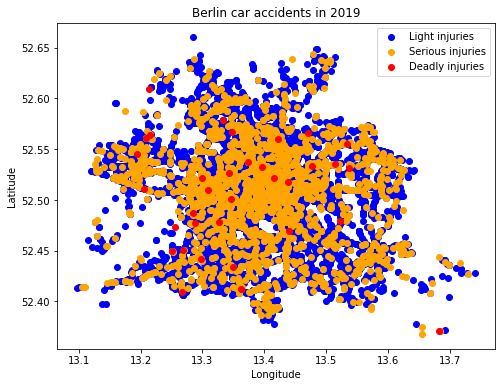

In [8]:
# let's plot the type of injuries
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
gdf[gdf.UKATEGORIE == 3].plot(ax = ax, label = "Light injuries", color = "blue")
gdf[gdf.UKATEGORIE == 2].plot(ax = ax, label = "Serious injuries", color = "orange")
gdf[gdf.UKATEGORIE == 1].plot(ax = ax, label = "Deadly injuries", color = "red")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Berlin car accidents in 2019")

Let's explore in more detail the 34 deadline accidents, including plotting the map of the city behind in several ways

<AxesSubplot:>

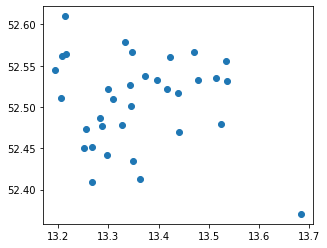

In [9]:
gdf = gdf[gdf.UKATEGORIE == 1]
gdf.plot()

# Folium 

Interactive map with folium, using a basemap

In [10]:
folium_map = folium.Map(location = [BERLIN_LAT, BERLIN_LON], tiles="Stamen Terrain", zoom_start=10, width="80%", height="80%")
folium_map

In [11]:
# let's add a marker for each of the accidents
folium.GeoJson(gdf).add_to(folium_map)

In [12]:
# display the map
folium_map